[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/deep-learning/anns/iris_single_classifier.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Perceptron neural network for binary classification
We will now use a simple Perceptron NN for binary classification, using the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). In this case, we use the four features of the iris dataset to classify whether an iris flower is virginica or not (recall, we have three types of iris: setosa, versicolor and virginica). Thus, our neural network will follow the next architecture (with 4 inputs):

<img src="img/iris_single_classifier.png" width="600px"/>

The output is a number between 0 and 1, which is the probability of being virginica.

In [1]:
# make sure the required packages are installed
%pip install pandas numpy seaborn matplotlib scikit-learn keras tensorflow --quiet
repo='data-science-course'
module='deep-learning/anns'
# if running in colab, install the required packages and copy the necessary files
if get_ipython().__class__.__module__.startswith('google.colab'):
    import os
    if not os.path.exists(repo):
        !git clone --filter=blob:none --sparse https://github.com/francisco-ortin/data-science-course.git 2>/dev/null
        !cd {repo} && git sparse-checkout init --cone && git sparse-checkout set {module}  2>/dev/null
    !cp --update {repo}/{module}/*.py . 2>/dev/null
    !mkdir -p img data
    !mv {repo}/{module}/img/* img/. 2>/dev/null
    !mv {repo}/{module}/data/* data/. 2>/dev/null

from keras.src.layers import Dense, Input
from keras.src.optimizers import SGD
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import numpy as np

from utils import show_history

Note: you may need to restart the kernel to use updated packages.



## Data preparation
We load the iris dataset from scikit-learn. Then, we create the X (independent variables) and y (dependent variable) dataframes. Finally, `iris_df` holds both X and y in the same dataframe.

In [2]:
# Load Iris Data
iris = load_iris()
# Creating pd DataFrames
X_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y_df = pd.DataFrame(data=iris.target, columns=['species'])
iris_df = pd.concat([X_df, y_df], axis=1)

Let's take a look at the dataset distribution:

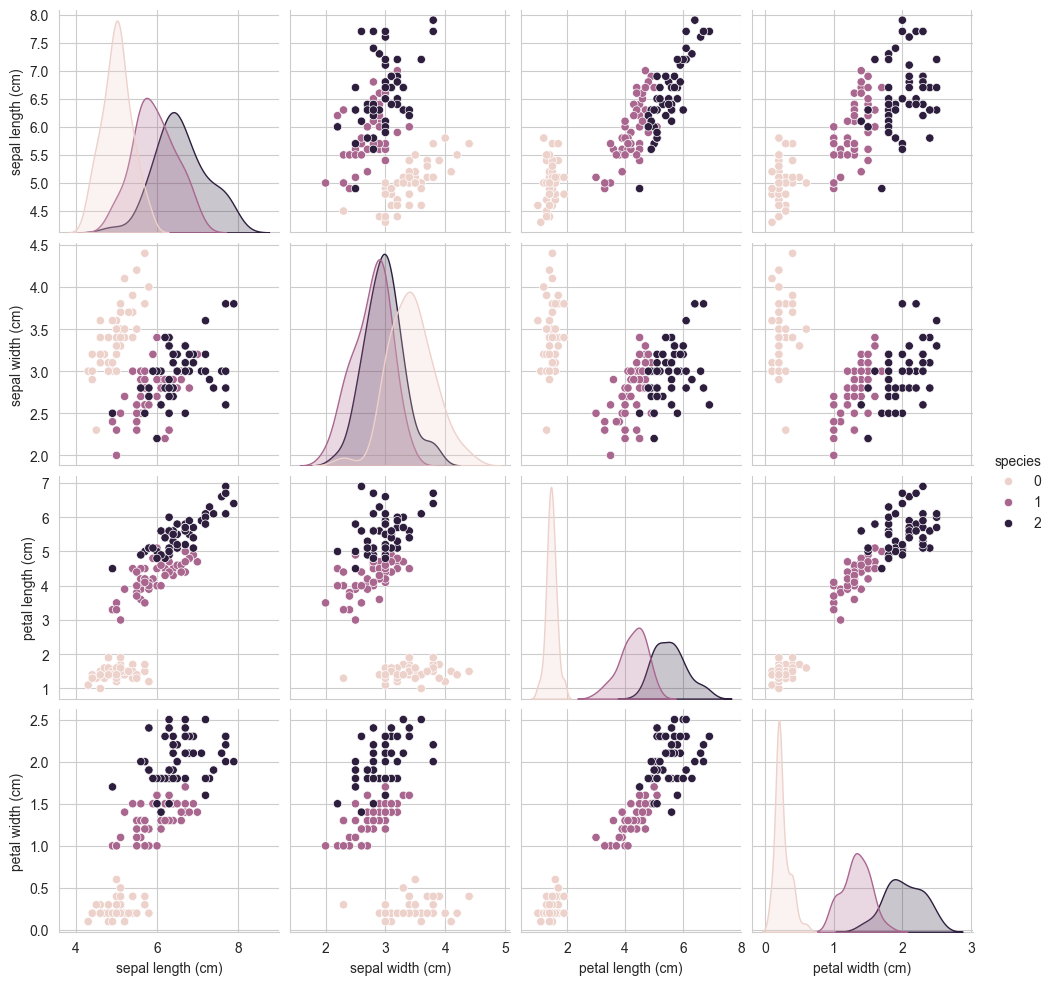

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [3]:
sns.pairplot(iris_df, hue='species')
plt.show()
print(iris_df.describe())

We now change the species target variable. Instead of three values, we just want to know whether it is virginica (1) or not (0). Recall, our classifier is binary.

In [4]:
# We will classify whether it is virginica or not (binary classification)
iris_df['species'] = iris_df['species'].apply(lambda specie: 1 if specie == 2 else 0)  # 2 = virginica
print(iris_df['species'].describe())

count    150.000000
mean       0.333333
std        0.472984
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: species, dtype: float64


We now divide the dataset into `X` and `y`. Then, we split the dataset in 80% train and 20% test.

In [5]:
# X is the dataset without the target variable (species)
X = iris_df.drop(labels='species', axis=1)
# y is species
y = iris_df['species']
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Neural network

A simple neuron is created with 4 inputs and 1 output.  A sigmoid activation function is required because we have a binary classifier. The network has one single neuron with 5 parameters: 4 input weights + the bias (b). All the parameters are trainable (learned) from data.

In [6]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(1, activation='sigmoid'))
model.summary()  # params=5 (4 weights for inputs + bias)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We will use binary cross entropy as the loss function, since we are building a binary classifier. For optimization, we use Stochastic Gradient Descent (SGD). We want to be prompted loss (binary cross entropy) and accuracy. 

In [7]:
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

We now train the model (learn the parameters) for 50 epochs. 

In [8]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50


4/4 [==============================] - 1s 9ms/step - loss: 2.5986 - accuracy: 0.3417
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 1.9392 - accuracy: 0.3417
Epoch 3/50
4/4 [==============================] - 0s 0s/step - loss: 1.5489 - accuracy: 0.2583
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 1.3879 - accuracy: 0.1250
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 1.3060 - accuracy: 0.2250
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.2571 - accuracy: 0.2917
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 1.2204 - accuracy: 0.3000
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1888 - accuracy: 0.3083
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 1.1579 - accuracy: 0.3083
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1274 - accuracy: 0.3083
Epoch 11/50
4/4 [=====================

Let's plot the training loss and accuracy for the training dataset:

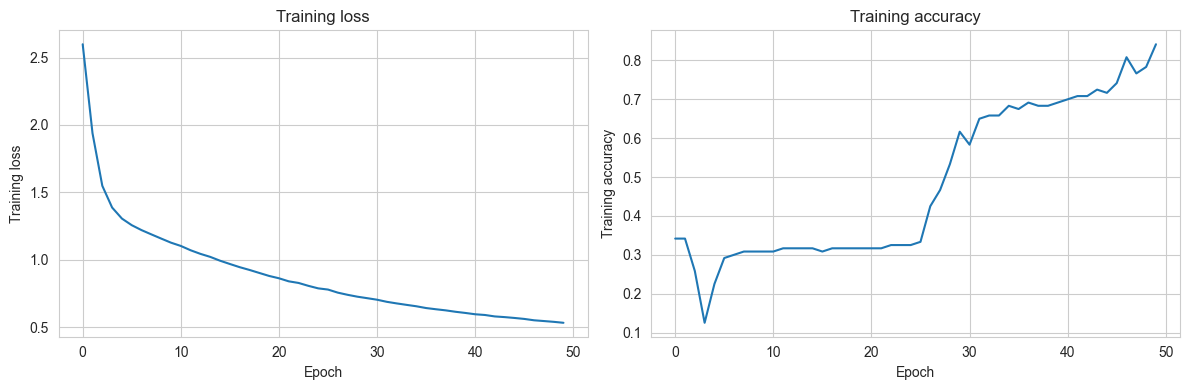

In [9]:
show_history(history, loss_label='Training loss', accuracy_label='Training accuracy')

## Prediction

We apply the neural network to the test dataset (forward propagation). That returns the *probabilities* of being viginica. Then, we compute the class (virginica or not) by using 0.5 as a threshold because we want a binary classifier (i.e., it must return 0 or 1).

In [10]:
prediction_probabilities = model.predict(X_test, verbose=0)
# np.vectorize returns function that expression that applies the lambda function to each element of the matrix
# In this way, we convert probabilities into classes (0 or 1)
prediction = np.vectorize(lambda x: 1 if x > 0.5 else 0)(prediction_probabilities)

## Assessment

We show accuracy and $F_1$-score for the test set.

In [11]:
print(f"Accuracy: {accuracy_score(y_test, prediction):.4f}.")
print(f"F1-score: {f1_score(y_test, prediction):.4f}.")

Accuracy: 0.9333.
F1-score: 0.8750.


## ✨ Questions ✨ 

1. Why is the $F_1$-score lower than accuracy?
2. In the figure above, why is one metric growing while the other is decreasing?
3. Do you think the model's performance could be improved by increasing the number of epochs? Or it will worsen because the model will overfit. Try it out.

### Answers

*Write your answers here.*

